# Heat Equation
## The Differential Equation
$$ \tau \frac{\partial}{\partial t} = \frac{1}{16}\frac{\partial^2 u}{\partial x^2}$$
## Initial Condition
$$ u(x,0)=2\sin(2\pi x) $$

## Boundary Condition
$$ u(0,t)=0,  u(1,t)=0 $$

## The Difference Equation
$$ w[k+1,i] = w[k,i] + \frac{1}{16}\frac{k}{h^2}(w[k,i+1]-2w[k,i]+w[k,i-1])$$


In [2]:
# LIBRARY
# vector manipulation
import numpy as np
# math functions
import math 

# THIS IS FOR PLOTTING

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")


[ 0.     0.025  0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225
  0.25   0.275  0.3    0.325  0.35   0.375  0.4    0.425  0.45   0.475  0.5
  0.525  0.55   0.575  0.6    0.625  0.65   0.675  0.7    0.725  0.75
  0.775  0.8    0.825  0.85   0.875  0.9    0.925  0.95   0.975  1.   ]
[-0.0784591  -0.15643447 -0.23344536 -0.30901699 -0.38268343 -0.4539905
 -0.52249856 -0.58778525 -0.64944805 -0.70710678 -0.76040597 -0.80901699
 -0.85264016 -0.89100652 -0.92387953 -0.95105652 -0.97236992 -0.98768834
 -0.99691733 -1.         -0.99691733 -0.98768834 -0.97236992 -0.95105652
 -0.92387953 -0.89100652 -0.85264016 -0.80901699 -0.76040597 -0.70710678
 -0.64944805 -0.58778525 -0.52249856 -0.4539905  -0.38268343 -0.30901699
 -0.23344536 -0.15643447 -0.0784591 ]


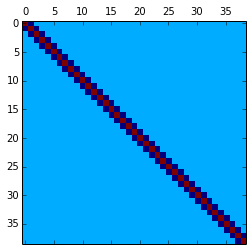

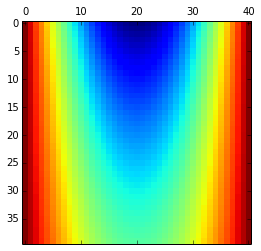

In [4]:
N=40
Nt=40
h=1/N
ht=1/Nt

time=np.arange(0,1.0001,h)

x=np.arange(0,1.0001,h)

w=np.zeros((Nt,N+1))

A=np.zeros((N-1,N-1))
c=np.zeros(N-1)

print(x)

for i in range (1,N):
    w[0,i]=-np.sin(np.pi*x[i])

print(w[0,1:N])

for i in range (0,N-1):
    A[i,i]=2

for i in range (0,N-2):           
    A[i+1,i]=-1
    A[i,i+1]=-1
    
A=np.eye(N-1)+1/16*ht/(h*h)*(A)
Ainv=np.linalg.inv(A)

fig = plt.figure(figsize=(8,4))
plt.matshow(A)

for k in range (1,Nt):
    #print(w[k-1,1:(N)])
    w[k,1:(N)]=np.dot(Ainv,w[k-1,1:(N)])


#print(np.dot(A,c))
fig = plt.figure(figsize=(8,4))
plt.matshow(w)